ResNet 18

In [1]:
#Imports
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


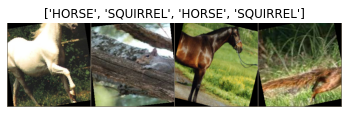

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
resnet18 = models.resnet18(pretrained=True)
num_ftrs = resnet18.fc.in_features

resnet18.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
resnet18 = resnet18.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch 0/99
----------
[TRAIN] Loss: 1.5053 Acc: 0.4701 F1-Score: 0.1122 Precision: 0.1752 Recall: 0.1180
[VALID] Loss: 0.7357 Acc: 0.7412 F1-Score: 0.1765 Precision: 0.2159 Recall: 0.1853

Epoch 1/99
----------
[TRAIN] Loss: 1.0115 Acc: 0.6828 F1-Score: 0.1723 Precision: 0.2282 Recall: 0.1709
[VALID] Loss: 0.3535 Acc: 0.9102 F1-Score: 0.2264 Precision: 0.2435 Recall: 0.2276

Epoch 2/99
----------
[TRAIN] Loss: 0.8234 Acc: 0.7636 F1-Score: 0.1970 Precision: 0.2424 Recall: 0.1911
[VALID] Loss: 0.2479 Acc: 0.9305 F1-Score: 0.2320 Precision: 0.2437 Recall: 0.2326

Epoch 3/99
----------
[TRAIN] Loss: 0.7795 Acc: 0.7522 F1-Score: 0.1951 Precision: 0.2390 Recall: 0.1885
[VALID] Loss: 0.1958 Acc: 0.9349 F1-Score: 0.2333 Precision: 0.2440 Recall: 0.2337

Epoch 4/99
----------
[TRAIN] Loss: 0.6344 Acc: 0.7988 F1-Score: 0.2068 Precision: 0.2448 Recall: 0.2001
[VALID] Loss: 0.1738 Acc: 0.9463 F1-Score: 0.2365 Precision: 0.2459 Recall: 0.2366

Epoch 5/99
----------
[TRAIN] Loss: 0.6083 Acc: 0.8093 

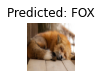

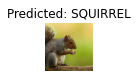

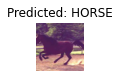

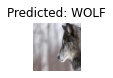

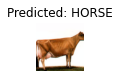

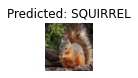

In [5]:
base_model = train_model(resnet18,"resnet", criterion, optimizer, step_lr_scheduler, NUM_EPOCHS)
visualize_model(base_model)
plt.show()

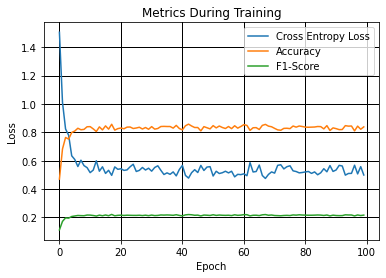

In [6]:
#Plotten
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.plot(f1_Scores, label="F1-Score")
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title('Metrics During Training');

In [7]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.1559 Acc: 0.9480 F1-Score: 0.2393 Precision: 0.2490 Recall: 0.2379
Test complete in 0m 6s
